In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import joblib
import pickle
import mnist_loader
from architecture import Network

In [3]:
model = joblib.load("../trained_model.pkl")

In [4]:
model.sizes

[784, 30, 10]

In [5]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [6]:
test_data = list(test_data)

In [9]:
len(test_data)

10000

In [ ]:
test_data[0][0].shape, test_data[0][1] #first image's true label is 7

((784, 1), np.int64(7))

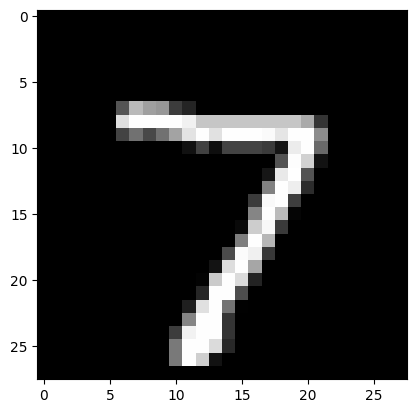

In [20]:
plt.imshow(test_data[0][0].reshape(28, 28), cmap='gray')

In [21]:
test_results = [(np.argmax(model.feed_forward(x)[0][-1]), y) for (x, y) in test_data]
test_results

[(np.int64(7), np.int64(7)),
 (np.int64(2), np.int64(2)),
 (np.int64(1), np.int64(1)),
 (np.int64(0), np.int64(0)),
 (np.int64(4), np.int64(4)),
 (np.int64(1), np.int64(1)),
 (np.int64(4), np.int64(4)),
 (np.int64(9), np.int64(9)),
 (np.int64(8), np.int64(5)),
 (np.int64(9), np.int64(9)),
 (np.int64(0), np.int64(0)),
 (np.int64(6), np.int64(6)),
 (np.int64(9), np.int64(9)),
 (np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(5), np.int64(5)),
 (np.int64(9), np.int64(9)),
 (np.int64(7), np.int64(7)),
 (np.int64(3), np.int64(3)),
 (np.int64(4), np.int64(4)),
 (np.int64(9), np.int64(9)),
 (np.int64(6), np.int64(6)),
 (np.int64(6), np.int64(6)),
 (np.int64(5), np.int64(5)),
 (np.int64(4), np.int64(4)),
 (np.int64(0), np.int64(0)),
 (np.int64(7), np.int64(7)),
 (np.int64(4), np.int64(4)),
 (np.int64(0), np.int64(0)),
 (np.int64(1), np.int64(1)),
 (np.int64(3), np.int64(3)),
 (np.int64(1), np.int64(1)),
 (np.int64(3), np.int64(3)),
 (np.int64(4), np.int64(4)),
 (np.int64(7),

### As we can see, the model corretly classifies a lot of these samples, the first element of each tuple is our models prediction and the second element is the true label

In [27]:
test_results = np.array(test_results)
test_results

array([[7, 7],
       [2, 2],
       [1, 1],
       ...,
       [4, 4],
       [5, 5],
       [6, 6]], shape=(10000, 2))

### Lets check where our mo0del fails to predict the correct label

In [44]:
print(f"Number of misclassified numbers: {np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]}")
print(f"Fraction of misclassified numbers: {np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]/len(test_data)}")
print(f"Fraction of correctly classified numbers: {1 - np.where(test_results[:, 0] != test_results[:, 1])[0].shape[0]/len(test_data)}")

Number of misclassified numbers: 511
Fraction of misclassified numbers: 0.0511
Fraction of correctly classified numbers: 0.9489


In [47]:
np.where(test_results[:, 0] != test_results[:, 1])[0]

array([   8,   61,   68,  108,  149,  151,  233,  241,  247,  259,  318,
        320,  321,  340,  352,  381,  412,  433,  435,  445,  448,  479,
        490,  495,  508,  542,  551,  578,  582,  591,  597,  610,  619,
        628,  629,  659,  667,  674,  691,  707,  717,  720,  791,  795,
        810,  830,  844,  870,  881,  900,  924,  935,  947,  950,  951,
        959,  965,  982,  992, 1014, 1032, 1039, 1044, 1062, 1073, 1107,
       1112, 1114, 1124, 1125, 1182, 1191, 1192, 1194, 1198, 1204, 1206,
       1208, 1226, 1232, 1242, 1247, 1272, 1283, 1289, 1299, 1319, 1325,
       1326, 1328, 1378, 1410, 1413, 1414, 1425, 1444, 1467, 1469, 1494,
       1500, 1522, 1530, 1549, 1553, 1559, 1581, 1609, 1618, 1640, 1671,
       1681, 1686, 1709, 1717, 1732, 1737, 1748, 1754, 1790, 1800, 1808,
       1823, 1828, 1857, 1878, 1880, 1901, 1917, 1930, 1952, 1982, 1984,
       2004, 2016, 2018, 2035, 2043, 2044, 2049, 2053, 2063, 2070, 2098,
       2105, 2109, 2115, 2118, 2129, 2135, 2138, 21

**Lets check out the first index in the above list**

In [32]:
test_results[8]

array([8, 5])

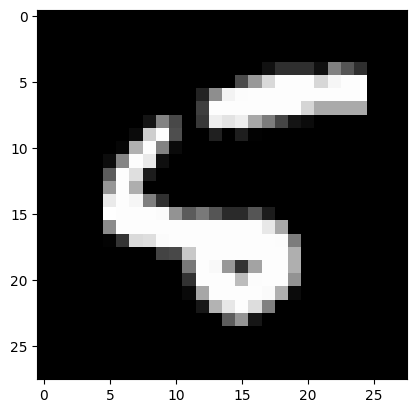

In [33]:
plt.imshow(test_data[8][0].reshape(28, 28), cmap='gray')

### Our model incorrectly predicts this image as an 8, when in reality it is a 5, but to be honest this image is a very hard image even for us to classify